<a href="https://colab.research.google.com/github/prodbylo2/Machine-Learning/blob/main/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()

# Extract petal length and petal width as features (X)
# and create a target variable (y) indicating whether the flower is Setosa (1) or not (0)
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

# Create a Perceptron classifier and train it on the data
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# Make a prediction on a new data point
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1])

Okay, let's discuss what a meshgrid is:

In the context of this code and data visualization, a meshgrid is a way to create a rectangular grid of points spanning a specific area in a 2D space. Think of it like a grid you'd use to plot points on a graph.

Why is a Meshgrid Used Here?

The goal is to visualize the decision boundary of the Perceptron model. This boundary is a line (or a hyperplane in higher dimensions) that separates the two classes of flowers ("Iris-Setosa" and "Not Iris-Setosa").

To visualize this boundary, we need to:

Generate points across the entire area of interest: We want to see how the model classifies points not just where our original data points are located, but across the entire range of petal lengths and widths we care about. This is where the meshgrid comes in.

Predict the class for each point on the grid: We use the trained Perceptron model to predict the class (Setosa or not Setosa) for each point on the meshgrid.

Color the grid based on the predictions: This creates the visual representation of the decision boundary. Areas with the same predicted class are colored similarly, showing us the regions where the model predicts one class versus the other.

How np.meshgrid Works:

It takes two 1D arrays representing the x-coordinates and y-coordinates of the grid points. In this code:

np.linspace(axes[0], axes[1], 500) creates 500 evenly spaced points between axes[0] and axes[1] (representing petal length).
np.linspace(axes[2], axes[3], 200) creates 200 evenly spaced points between axes[2] and axes[3] (representing petal width).
np.meshgrid then combines these two 1D arrays to create two 2D arrays:

x0 contains the x-coordinates of all the grid points.
x1 contains the y-coordinates of all the grid points.
This structure allows you to easily access the coordinates of any point on the grid and perform calculations with them (like making predictions with the Perceptron).

In simpler terms:

Imagine laying a transparent grid paper over your plot. The meshgrid is like that grid paper, providing a systematic way to represent every point within the area you want to visualize. You then ask your model to predict the class for each point on that grid paper, and you color the corresponding grid square accordingly. This creates a visual map of your model's decision-making process.

Saving figure perceptron_iris_plot


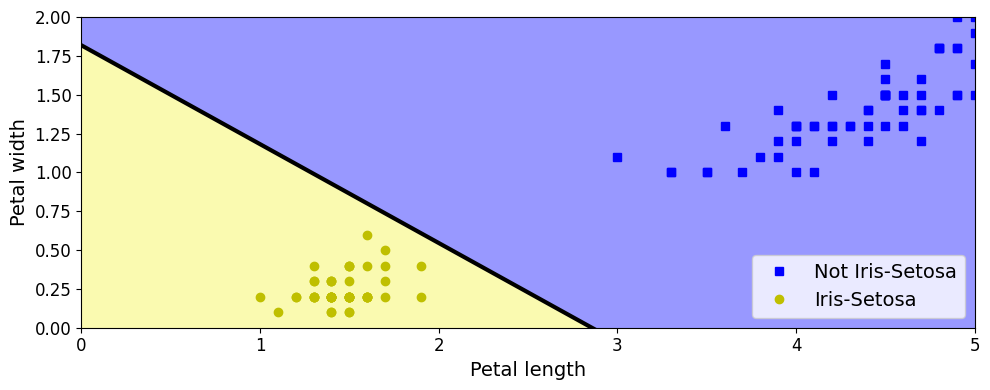

In [8]:
''' This code visualizes the decision boundary of a Perceptron model trained to classify Iris
flowers as either "Iris-Setosa" or "Not Iris-Setosa" based on their petal length and width.
'''

# stores the weights of the trained Perceptron model
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]

# stores the bias term
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

'''
per_clf.predict(X_new) -> predicts the class for each point in the meshgrid.
zz -> reshapes the predictions to match the shape of the meshgrid, for use in contour plotting.
'''

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


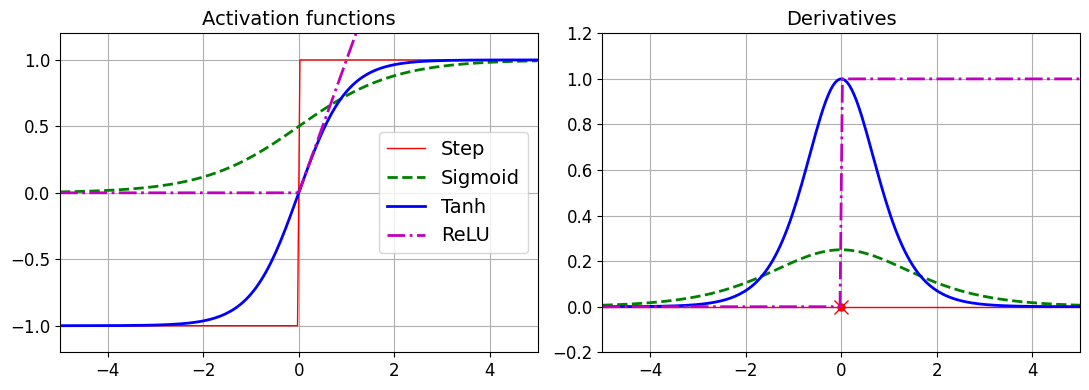

In [11]:
'''
Visualizing Activation Functions and Their Derivatives
This code snippet focuses on visualizing four common activation functions used in neural networks: Step, Sigmoid, Tanh (hyperbolic tangent),
and ReLU (Rectified Linear Unit). It also visualizes the derivatives of these functions.
'''

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [12]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

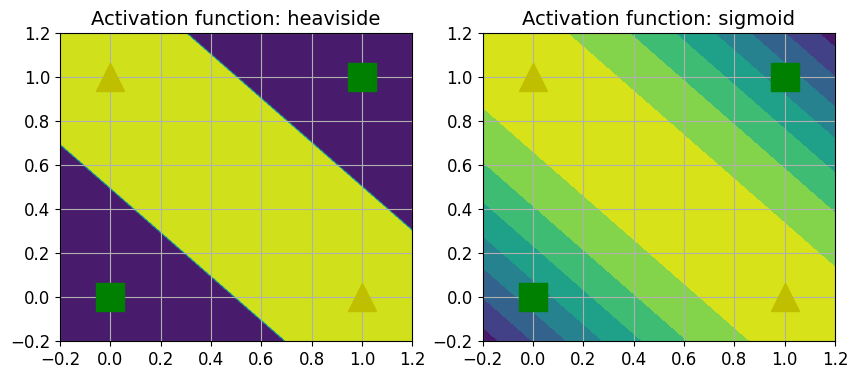

In [14]:
'''
The Heaviside activation function is more sensitive to noise in the input data,
as small changes can lead to large changes in output.
The sigmoid activation function is less sensitive to noise, as small changes in input lead to smaller changes in output.
The sigmoid activation function is also more flexible than the Heaviside activation function,
as it can learn more complex decision boundaries.
'''

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
tf.__version__

'2.17.0'

In [17]:
keras.__version__

'3.4.1'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [19]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [20]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [21]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

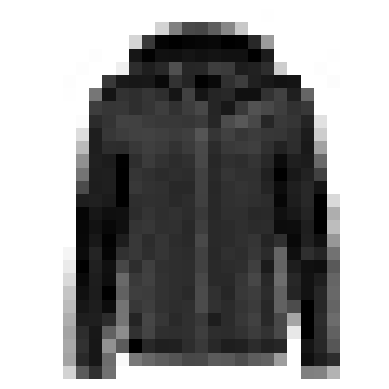

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [25]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [26]:
X_valid.shape

(5000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


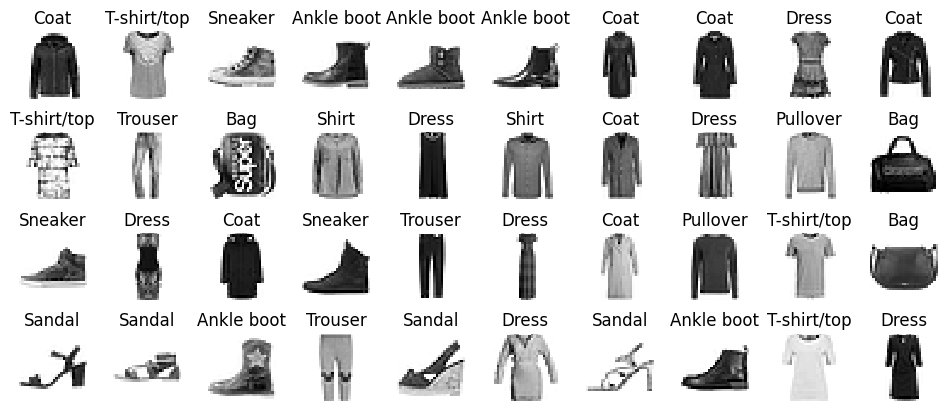

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In Summary:

This code defines a neural network with the following structure:

Input layer: Flattens the image into a 1D array.
Hidden layer 1: 300 neurons, ReLU activation.
Hidden layer 2: 100 neurons, ReLU activation.
Output layer: 10 neurons, softmax activation.
This model is a basic feedforward neural network, where information flows from the input to the output layer through the hidden layers. Each layer processes the data and extracts features, ultimately leading to a classification prediction.

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

Model Architecture:

Flatten: The first layer is Flatten, which reshapes the input data into a one-dimensional vector. This is often necessary when dealing with image data, which is typically represented as a 2D or 3D array.
Dense (300): The second layer is a Dense layer with 300 units. This layer is fully connected, meaning that each unit is connected to every unit in the previous layer. Dense layers are often used for extracting features from the input data.
Dense (100): The third layer is another Dense layer with 100 units. This layer is also fully connected and is used for further feature extraction.
Dense (10): The final layer is a Dense layer with 10 units. This layer is the output layer and is used to predict the class probabilities for the input data. In this case, the model is likely being used for a classification task with 10 possible classes.
Model Parameters:

Total params: 266,610. This is the total number of parameters in the model, which includes the weights and biases of each neuron.
Trainable params: 266,610. This is the number of parameters that can be updated during training. In this case, all parameters are trainable.
Non-trainable params: 0. This is the number of parameters that are fixed and cannot be updated during training. In this case, there are no non-trainable parameters.

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

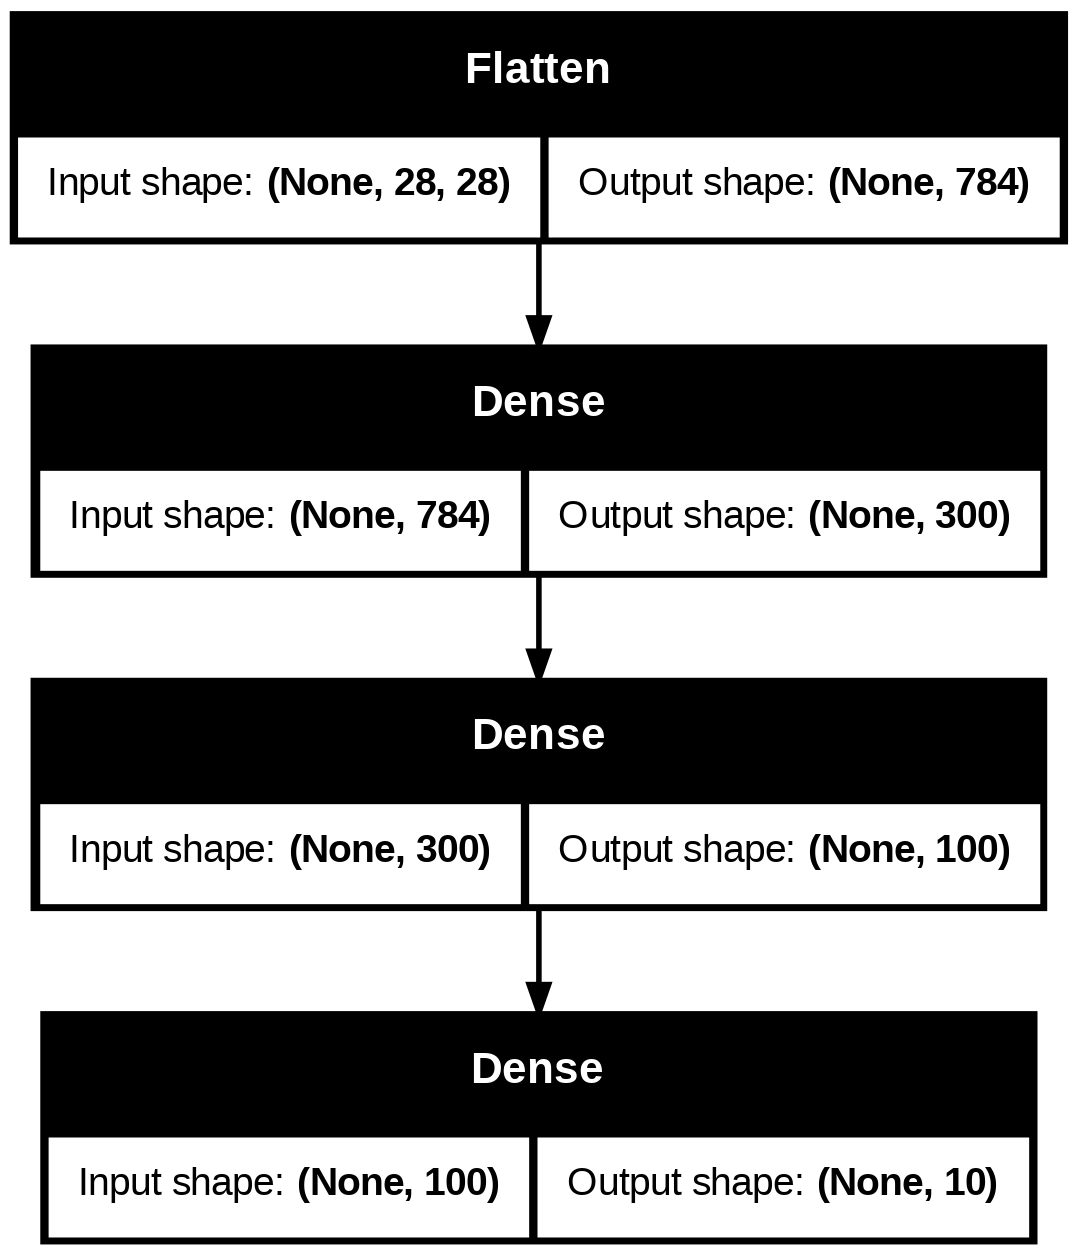

In [43]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [44]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [45]:
model.get_layer(hidden1.name) is hidden1

True

In [46]:
weights, biases = hidden1.get_weights()

In [47]:
weights

array([[ 0.05685423, -0.0012256 ,  0.06232162, ..., -0.01883432,
        -0.05652974,  0.06417245],
       [-0.03589663,  0.00458658, -0.02214457, ...,  0.00202538,
        -0.0301593 ,  0.07089773],
       [-0.03484085, -0.06998577, -0.00952239, ..., -0.04522137,
        -0.02690557,  0.07027499],
       ...,
       [ 0.00069667, -0.05186598,  0.05550891, ..., -0.02805396,
        -0.02384539,  0.04113086],
       [-0.06456041, -0.05181802,  0.01108614, ...,  0.00402481,
        -0.06869101, -0.011337  ],
       [-0.061173  ,  0.00887278, -0.02268819, ...,  0.02556023,
         0.02794402,  0.01404689]], dtype=float32)

In [48]:
weights.shape

(784, 300)

In [49]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
biases.shape

(300,)

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [52]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6707 - loss: 1.0142 - val_accuracy: 0.8182 - val_loss: 0.5259
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8237 - loss: 0.5058 - val_accuracy: 0.8400 - val_loss: 0.4605
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8420 - loss: 0.4512 - val_accuracy: 0.8514 - val_loss: 0.4257
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8527 - loss: 0.4206 - val_accuracy: 0.8606 - val_loss: 0.4033
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8603 - loss: 0.3986 - val_accuracy: 0.8656 - val_loss: 0.3860
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8652 - loss: 0.3817 - val_accuracy: 0.8674 - val_loss: 0.3739
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8697 - loss: 0.3675 - val_accuracy: 0.8704 - val_loss: 0.3624
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8738 - loss: 0.3553 

In [53]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [54]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

The image shows a plot of the training and validation loss and accuracy over 30 epochs for a neural network model. Here's a breakdown of what each line represents:

accuracy: This line shows the training accuracy of the model over the epochs. It starts low and gradually increases as the model learns.
loss: This line shows the training loss of the model over the epochs. It starts high and gradually decreases as the model learns.
val_accuracy: This line shows the validation accuracy of the model over the epochs. It is calculated on a separate dataset that is not used for training. It can help to identify overfitting, where the model performs well on the training data but poorly on new, unseen data.
val_loss: This line shows the validation loss of the model over the epochs. It is calculated on a separate dataset that is not used for training. It can also help to identify overfitting.
From the plot, we can see that the training accuracy and validation accuracy both increase over the epochs, while the training loss and validation loss both decrease. This indicates that the model is learning and improving its performance. However, there is a gap between the training and validation accuracy, which suggests that the model may be overfitting to the training data.

Overall, the plot shows that the model is making progress but may need further tuning or regularization to improve its generalization performance.

Saving figure keras_learning_curves_plot


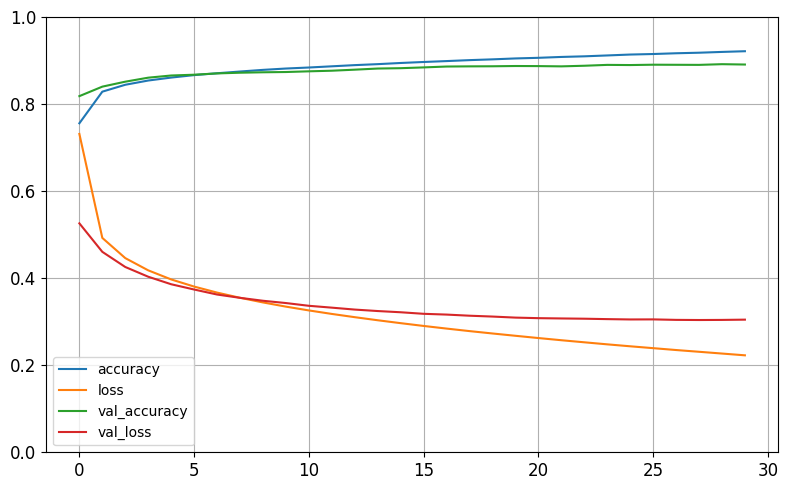

In [57]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [58]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.3357


[0.33663564920425415, 0.8795999884605408]

In [59]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [60]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([9, 2, 1])

In [61]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [62]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


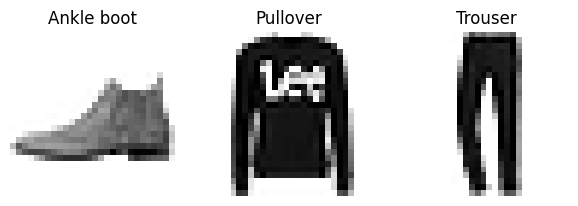

In [63]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP (Multi Layer Perceptron)

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

Building, training, evaluating and using a regression MLP using the Sequential API to
make predictions is quite similar to what we did for classification. The main differ‐
ences are the fact that the output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the
mean squared error. Since the dataset is quite noisy, we just use a single hidden layer
with fewer neurons than before, to avoid overfitting:


In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2782 - val_loss: 1.3300
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9544 - val_loss: 0.7394
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7675 - val_loss: 0.6307
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6957 - val_loss: 0.5826
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6506 - val_loss: 0.5500
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6172 - val_loss: 0.5246
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5903 - val_loss: 0.5040
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5679 - val_loss: 0.4868
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5488 - val_loss: 0.4725
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5326 - val_loss: 0.4609
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5188 - val_loss: 0.4515
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

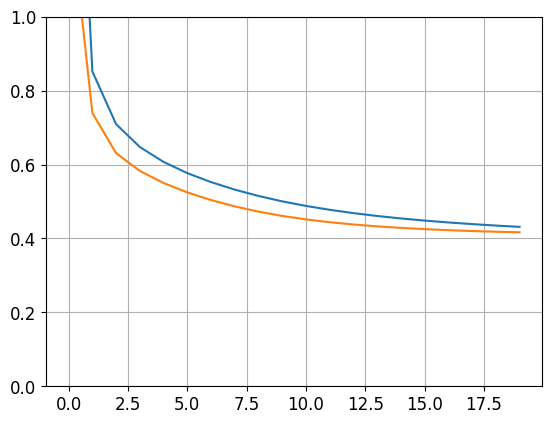

In [68]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
y_pred

array([[0.712999 ],
       [1.5928025],
       [3.2560277]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [72]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 30)             │            270 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 30)             │            930 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ input_layer_3[0][0],   │
│                           │                        │                │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3026 - val_loss: 0.6553
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7015 - val_loss: 0.6392
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6500 - val_loss: 0.5705
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6116 - val_loss: 0.5514
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5808 - val_loss: 0.5231
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5556 - val_loss: 0.5066
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5347 - val_loss: 0.4917
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5171 - val_loss: 0.4824
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5022 - val_loss: 0.4721
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4894 - val_loss: 0.4614
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4784 - val_loss: 0.4511
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5413 - val_loss: 1.6821
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7904 - val_loss: 0.9614
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6806 - val_loss: 0.7102
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6341 - val_loss: 0.5953
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6016 - val_loss: 0.5361
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5758 - val_loss: 0.5022
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5544 - val_loss: 0.4800
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5365 - val_loss: 0.4635
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5212 - val_loss: 0.4500
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5082 - val_loss: 0.4393
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4971 - val_loss: 0.4305
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Adding an auxiliary output for regularization:

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [79]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [80]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9691 - val_loss: 1.8251
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0219 - val_loss: 1.3820
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8620 - val_loss: 1.1795
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7783 - val_loss: 1.0350
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7196 - val_loss: 0.9266
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6772 - val_loss: 0.8441
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6447 - val_loss: 0.7802
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6190 - val_loss: 0.7290
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5982 - val_loss: 0.6871
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5808 - val_loss: 0.6513
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5661 - val_loss: 0.6213
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [84]:
# total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4755


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


# The subclassing API

Both the Sequential API and the Functional API are declarative: you start by declar‐
ing which layers you want to use and how they should be connected, and only then
can you start feeding the model some data for training or inference. This has many
advantages: the model can easily be saved, cloned, shared, its structure can be dis‐
played and analyzed, the framework can infer shapes and check types, so errors can
be caught early (i.e., before any data ever goes through the model). It’s also fairly easy
to debug, since the whole model is just a static graph of layers. But the flip side is just
that: it’s static. Some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, or simply if you prefer a more impera‐
tive programming style, the Subclassing API is for you.


In [85]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [87]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6060 - val_loss: 0.6069
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5905 - val_loss: 0.5793
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5774 - val_loss: 0.5553
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5663 - val_loss: 0.5356
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5567 - val_loss: 0.5194
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5482 - val_loss: 0.5061
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5407 - val_loss: 0.4955
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5340 - val_loss: 0.4867
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5281 - val_loss: 0.4823
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5227 - val_loss: 0.4792
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


# Saving and Restoring

In [88]:
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4896 - val_loss: 2.3467
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7765 - val_loss: 0.8926
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6449 - val_loss: 0.5988
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5931 - val_loss: 0.5237
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5578 - val_loss: 0.4905
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5306 - val_loss: 0.4683
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5087 - val_loss: 0.4514
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4911 - val_loss: 0.4387
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4768 - val_loss: 0.4291
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4650 - val_loss: 0.4221
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4298


In [91]:
model.save("my_keras_model.h5")

In [93]:
# Add this line before loading the model
from keras.losses import MeanSquaredError

# Load the model and specify the 'mse' loss function
model = keras.models.load_model("my_keras_model.h5", custom_objects={'mse': MeanSquaredError})

In [94]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[0.5764819],
       [1.3250115],
       [3.2291176]], dtype=float32)

In [96]:
model.save_weights("my_keras_weights.weights.h5") # Change the filename to end with .weights.h5

In [98]:
model.load_weights("my_keras_weights.weights.h5")

# Using Callbacks during Training

In [99]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4506 - val_loss: 0.4448
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4423 - val_loss: 0.4405
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4354 - val_loss: 0.4363
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4294 - val_loss: 0.4337
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4242 - val_loss: 0.4308
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4195 - val_loss: 0.4284
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4153 - val_loss: 0.4253
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4116 - val_loss: 0.4223
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.4201
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4051 - val_loss: 0.4167
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3947


In [105]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4022 - val_loss: 0.4171
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3995 - val_loss: 0.4162
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3972 - val_loss: 0.4144
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3949 - val_loss: 0.4138
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3928 - val_loss: 0.4131
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3909 - val_loss: 0.4113
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3891 - val_loss: 0.4107
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3874 - val_loss: 0.4106
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3858 - val_loss: 0.4085
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3843 - val_loss: 0.4082
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3828 - val_loss: 0.4094
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━

In [106]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [107]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3741
val/train: 1.13
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3741 - val_loss: 0.4070


# TensorBoard

In [108]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [109]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_10_23-11_41_38'

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6762 - val_loss: 2.0299
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9816 - val_loss: 1.3309
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8072 - val_loss: 1.0135
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7310 - val_loss: 0.8207
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6737 - val_loss: 0.6914
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6269 - val_loss: 0.6032
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5879 - val_loss: 0.5415
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5540 - val_loss: 0.4974
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5247 - val_loss: 0.4655
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5002 - val_loss: 0.4425
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4807 - val_loss: 0.4264
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [175]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

In [114]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2024_10_23-11_43_35'

In [115]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [116]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8534 - val_loss: 0.6187
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4453 - val_loss: 864.5429
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5058 - val_loss: 0.3681
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3899 - val_loss: 0.3514
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3800 - val_loss: 0.4167
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3344
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3551 - val_loss: 0.3329
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3506 - val_loss: 0.3257
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3429 - val_loss: 0.3264
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3364 - val_loss: 0.3238
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3284 - val_loss: 0.3201
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [118]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.src.callbacks.tensorboard:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [119]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [120]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [122]:
!pip install scikeras

In [124]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model)

In [125]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.1078 - val_loss: 4.9232
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6591 - val_loss: 6.4835
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5794 - val_loss: 4.1935
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5282 - val_loss: 4.0374
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4982 - val_loss: 2.2544
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4747 - val_loss: 1.9025
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4586 - val_loss: 1.0570
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4461 - val_loss: 0.9604
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4368 - val_loss: 0.6201
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4291 - val_loss: 0.6196
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4227 - val_loss: 0.4735
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━

KerasRegressor(
	model=<function build_model at 0x7c900cb50a60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [126]:
mse_test = keras_reg.score(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [127]:
y_pred = keras_reg.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [128]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [132]:
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV

# Define the model architecture (replace with your desired architecture)
def create_model():
  model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1)  # Output layer for regression
  ])
  model.compile(loss='mse', optimizer='adam')
  return model

# Create the KerasRegressor with the model definition
keras_reg = KerasRegressor(model=create_model)

# Define parameter distributions for the search
param_distribs = {
  # ... other parameters you want to search for ...
}

# Perform RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.6826 - val_loss: 1.3060
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5169 - val_loss: 0.5761
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4206 - val_loss: 0.4296
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3893 - val_loss: 0.3750
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3721 - val_loss: 0.3699
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3608 - val_loss: 0.3536
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3527 - val_loss: 0.3688
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3461 - val_loss: 0.3497
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3420 - val_loss: 0.3736
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3360 - val_loss: 0.3520
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3341 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2263 - val_loss: 11.5472
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6552 - val_loss: 3.8644
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4868 - val_loss: 2.2392
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4242 - val_loss: 2.0670
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3933 - val_loss: 2.0122
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3755 - val_loss: 2.1828
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3642 - val_loss: 2.2145
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3561 - val_loss: 1.8822
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3500 - val_loss: 1.7686
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3448 - val_loss: 1.4984
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3407 - val_loss: 1.4662
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.7691 - val_loss: 0.7105
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5711 - val_loss: 0.6018
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4577 - val_loss: 0.4383
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4187 - val_loss: 0.4201
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3994 - val_loss: 0.3671
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3870 - val_loss: 0.3836
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3775 - val_loss: 0.3959
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3703 - val_loss: 0.5044
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3636 - val_loss: 0.6894
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3593 - val_loss: 1.4717
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3542 - val_loss: 2.6954
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9769 - val_loss: 0.5474
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5116 - val_loss: 0.5485
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4363 - val_loss: 0.3774
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4115 - val_loss: 0.4829
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3981 - val_loss: 0.8576
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3891 - val_loss: 0.8214
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3841 - val_loss: 1.3779
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3765 - val_loss: 0.4375
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3698 - val_loss: 1.4524
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3662 - val_loss: 0.6679
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3613 - val_loss: 1.0382
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function create_model at 0x7c900ace55a0>),
                   param_distributions={}, verbose=2)

In [133]:
rnd_search_cv.best_params_

{}

In [134]:
rnd_search_cv.best_score_

0.7742068643415628

In [135]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function create_model at 0x7c900ace55a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [136]:
rnd_search_cv.score(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.7835411900954572

In [139]:
model = rnd_search_cv.best_estimator_.model()
model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_5, built=True>

In [140]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2564


5.248466491699219

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [141]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [142]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [143]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [144]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

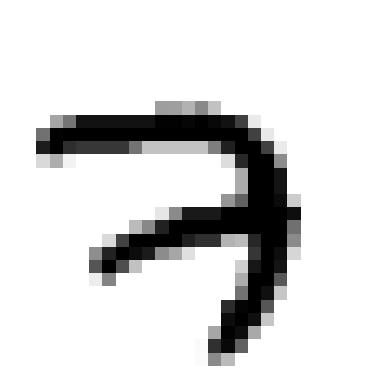

In [145]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [146]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [147]:
X_valid.shape

(5000, 28, 28)

In [148]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

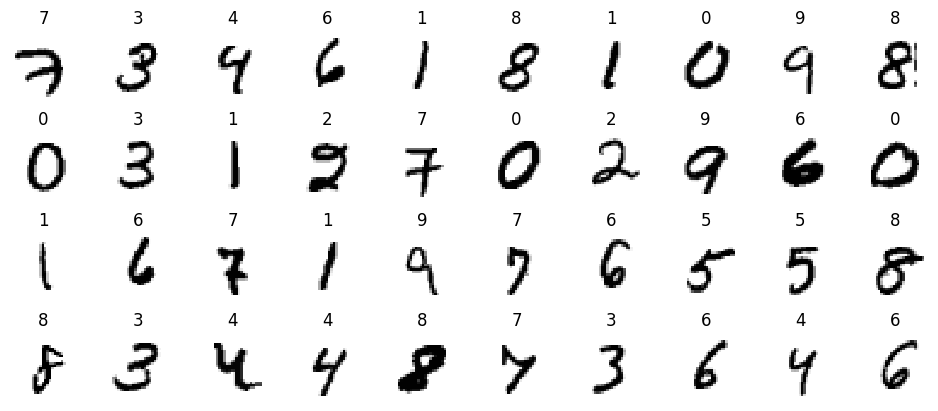

In [149]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [160]:
import tensorflow as tf
import keras
from keras.callbacks import Callback
from keras import backend as K

class ExponentialLearningRate(Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_begin(self, batch, logs):
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        # Get current learning rate using K.get_value with type casting to float32
        # self.rates.append(K.get_value(self.model.optimizer.learning_rate))   # Old code raising error

        # Changed to retrieve learning rate directly as a NumPy array
        self.rates.append(self.model.optimizer.learning_rate.numpy())
        self.losses.append(logs["loss"])
        # Update learning rate using K.set_value with type casting to float32
        # K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)  # Old Code

        # Update learning rate using tf.Variable.assign to set it directly
        self.model.optimizer.learning_rate.assign(self.model.optimizer.learning_rate * self.factor)

In [161]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [162]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [163]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [164]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5089 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


We can now plot the loss as a function of the learning rate:

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
<ipython-input-166-18bececb1fe0>:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis([min(rates), max(rates), 0, losses[0]])  # Use the modified rates and losses


Text(0, 0.5, 'Loss')

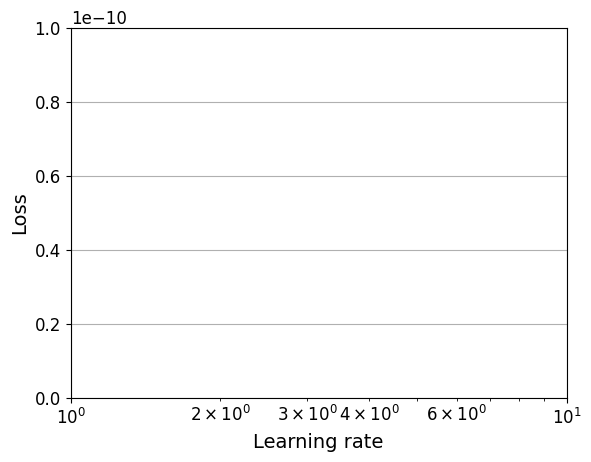

In [166]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))

# Replace NaN and inf values with finite values
rates = np.nan_to_num(expon_lr.rates, nan=1e-10, posinf=1e10, neginf=1e-10)  # Replace NaN and inf with safe values
losses = np.nan_to_num(expon_lr.losses, nan=1e-10, posinf=1e10, neginf=1e-10)

plt.axis([min(rates), max(rates), 0, losses[0]])  # Use the modified rates and losses
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [167]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [168]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [169]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [170]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [172]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8677 - loss: 0.4155 - val_accuracy: 0.9682 - val_loss: 0.1150
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9703 - loss: 0.1003 - val_accuracy: 0.9742 - val_loss: 0.0918
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9824 - loss: 0.0608 - val_accuracy: 0.9764 - val_loss: 0.0871
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0430 - val_accuracy: 0.9790 - val_loss: 0.0816
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9776 - val_loss: 0.0940
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9774 - val_loss: 0.1001
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9742 - val_loss: 0.1165
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9928 - 

In [173]:
model = keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9716 - loss: 0.1033


[0.0806327536702156, 0.9768999814987183]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [176]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
2024-10-23 14:00:29.179925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 14:00:29.219756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 14:00:29.231398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 14:00:30.716486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorfl